In [1]:
import pandas as pd
import matplotlib as mp

In [2]:
figsize_global = (10, 7)

In [3]:
def plot_openmp(foldername, title):
    dfplot = pd.DataFrame(columns=[title, '# Threads'])

    for num_threads in range(2, 9):
        df = pd.read_csv("../results/openmpresults/" + foldername + "/cleaned-omp-example-" + str(num_threads) + "t-log.out") 
        print("Median for num_threads " + str(num_threads) + " is " + str(df['Time'].mean()))
        dfplot = dfplot.append({'Mean times': df['Time'].mean(), '# Threads': num_threads}, ignore_index=True)
        
    dfplot.plot(x='# Threads', y='Mean times', grid=True, figsize=figsize_global, ylabel="Barrier Time (microsec)", title=title)

In [4]:
openmp_mappings = [
    ["baseline_outputs", "Baseline"],
    ["sense_reversal_outputs", "Sense Reversal"],
    ["disseminatoin_outputs", "Dissemincation"]
]

Baseline
Median for num_threads 2 is 20.95
Median for num_threads 3 is 48.833333333333336
Median for num_threads 4 is 71.4
Median for num_threads 5 is 88.86000000000001
Median for num_threads 6 is 106.76666666666667
Median for num_threads 7 is 139.35714285714286
Median for num_threads 8 is 146.08749999999998
Sense Reversal
Median for num_threads 2 is 30.65
Median for num_threads 3 is 43.53333333333334
Median for num_threads 4 is 68.975
Median for num_threads 5 is 83.48
Median for num_threads 6 is 102.60000000000001
Median for num_threads 7 is 118.01428571428572
Median for num_threads 8 is 138.675
Dissemincation
Median for num_threads 2 is 32.3
Median for num_threads 3 is 50.800000000000004
Median for num_threads 4 is 68.575
Median for num_threads 5 is 88.36
Median for num_threads 6 is 109.53333333333335
Median for num_threads 7 is 139.04285714285714
Median for num_threads 8 is 147.775


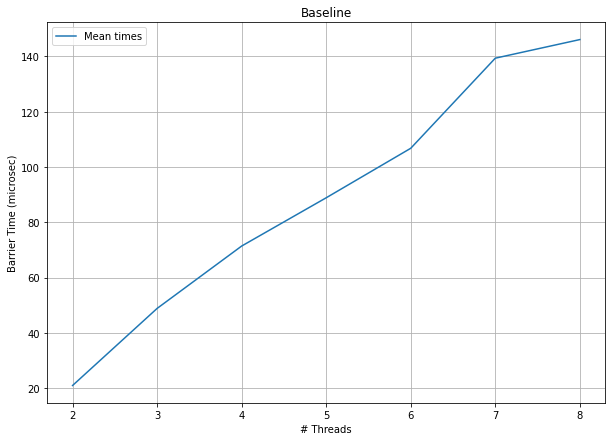

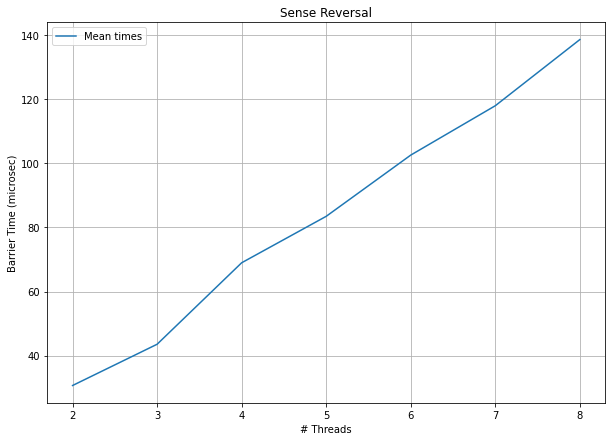

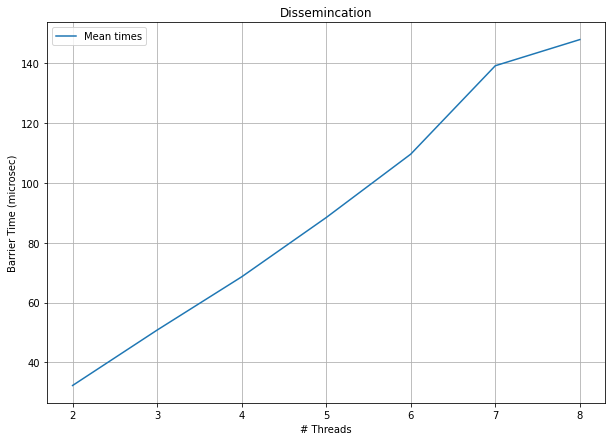

In [5]:
for [foldername, title] in openmp_mappings:
    print(title)
    plot_openmp(foldername, title)

In [6]:
def plot_openmp_all():
    result = None
    for [foldername, title] in openmp_mappings:
        df = pd.DataFrame()
        for num_threads in range(2, 9):
            dftemp = pd.read_csv("../results/openmpresults/" + foldername + "/cleaned-omp-example-" + str(num_threads) + "t-log.out") 
            df = df.append({title: dftemp['Time'].mean(), '# Threads': num_threads}, ignore_index=True)
        # result = pd.concat([result, df], axis = 1, join="outer")
        
        if result is None:
            result = df
        else:
            result = result.join(df[title])
        print(result)
    result.plot(x='# Threads', grid=True, figsize=figsize_global, ylabel="Barrier Time (microsec)", title="Comparison")


   # Threads    Baseline
0        2.0   20.950000
1        3.0   48.833333
2        4.0   71.400000
3        5.0   88.860000
4        6.0  106.766667
5        7.0  139.357143
6        8.0  146.087500
   # Threads    Baseline  Sense Reversal
0        2.0   20.950000       30.650000
1        3.0   48.833333       43.533333
2        4.0   71.400000       68.975000
3        5.0   88.860000       83.480000
4        6.0  106.766667      102.600000
5        7.0  139.357143      118.014286
6        8.0  146.087500      138.675000
   # Threads    Baseline  Sense Reversal  Dissemincation
0        2.0   20.950000       30.650000       32.300000
1        3.0   48.833333       43.533333       50.800000
2        4.0   71.400000       68.975000       68.575000
3        5.0   88.860000       83.480000       88.360000
4        6.0  106.766667      102.600000      109.533333
5        7.0  139.357143      118.014286      139.042857
6        8.0  146.087500      138.675000      147.775000


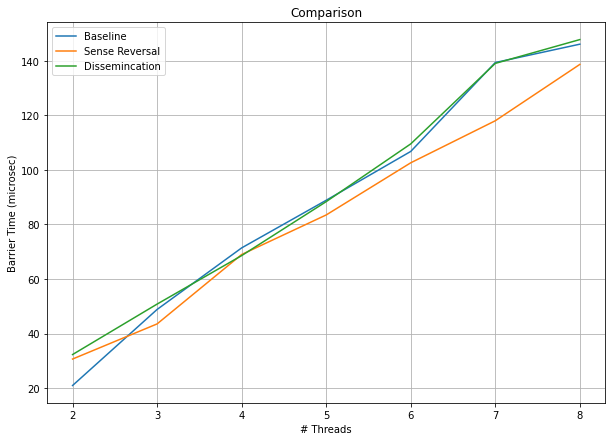

In [7]:
plot_openmp_all()